# 以經濟部的施政計畫報告書為例(Open Data網站上找來的)
## 網址為：https://www.moea.gov.tw/mns/cord/content/Content.aspx?menu_id=41456
### 一般政府報告書民眾比較沒興趣全部精讀，可以藉由一些text mining技術略探一二

In [1]:
# 下載115年度的計劃書，並由PDF套件抓取文字儲存成文字檔
from PyPDF2 import PdfReader

!wget -O 115.pdf https://www.moea.gov.tw/Mns/main/content/wHandEditorFile.ashx?file_id=15128

reader = PdfReader("115.pdf")
with open("output_115.txt", "w", encoding="utf-8") as f:
    for page in reader.pages:
        t = page.extract_text()
        if t:
            f.write(t + '\n')
    f.close()

--2025-10-26 22:09:45--  https://www.moea.gov.tw/Mns/main/content/wHandEditorFile.ashx?file_id=15128
Resolving www.moea.gov.tw (www.moea.gov.tw)... 2606:4700::6812:171, 2606:4700::6812:71, 104.18.0.113, ...
Connecting to www.moea.gov.tw (www.moea.gov.tw)|2606:4700::6812:171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 420060 (410K) [application/pdf]
Saving to: ‘115.pdf’

115.pdf             100%[===================>] 410.21K  1.13MB/s    in 0.4s    

2025-10-26 22:09:46 (1.13 MB/s) - ‘115.pdf’ saved [420060/420060]



In [2]:
# 安裝完jieba後直接快速使用，並過濾一些常見的不需要字串
from collections import Counter
import jieba
import jieba.analyse
import re

text_115 = open("output_115.txt","r",encoding="utf-8").read()

text_115 = str(text_115)
text_115 = re.sub("xe2","",text_115)
text_115 = re.sub("x80","",text_115)
text_115 = re.sub("x99","",text_115)
text_115 = re.sub("x0c","",text_115)
text_115 = re.sub("x93","",text_115)
text_115 = re.sub("xe","",text_115)
text_115 = re.sub("x93","",text_115)
text_115 = re.sub("x93","",text_115)

text_115 = re.sub("一","",text_115)
text_115 = re.sub("二","",text_115)
text_115 = re.sub("三","",text_115)
text_115 = re.sub("四","",text_115)
text_115 = re.sub("五","",text_115)
text_115 = re.sub("六","",text_115)
# text = re.sub("\\\\","",text)

text_115 = re.sub("，","",text_115)
text_115 = re.sub("、","",text_115)
text_115 = re.sub("。","",text_115)
text_115 = re.sub("與","",text_115)
text_115 = re.sub("及","",text_115)
text_115 = re.sub("（","",text_115)
text_115 = re.sub("）","",text_115)
text_115 = re.sub("「","",text_115)
text_115 = re.sub("」","",text_115)


# 取前25名的TF-IDF斷詞後字詞
tags = jieba.analyse.extract_tags(text_115, topK=25, withWeight=True)

seg_list = jieba.lcut(text_115, cut_all=False)
dictionary = Counter(seg_list)

/home/timtimbombom/anaconda3/envs/LDAvis_jupyter/lib/python3.12/site-packages/jieba/_compat.py:18: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.357 seconds.
Prefix dict has been built successfully.


In [3]:
# 上面tags的用途，使用jieba裡面預設的TF-IDF排序
freq = {}
for ele in dictionary:
    if ele in [ tu[0] for tu in tags]:
        freq[ele] = dictionary[ele]

# 看一下詞彙統計分佈 遞減
for index_descend_ in sorted(freq.items(), key=lambda x:x[1], reverse=True):
    print(index_descend_) 

('發展', 104)
('計畫', 87)
('科技', 75)
('推動', 67)
('技術', 56)
('辦理', 52)
('智慧', 47)
('產業', 45)
('能源', 45)
('提升', 43)
('企業', 36)
('協助', 35)
('AI', 30)
('創新', 29)
('建設', 29)
('環境', 28)
('服務', 28)
('轉型', 27)
('應用', 25)
('規劃', 24)
('國際', 22)
('研發', 22)
('數位', 21)
('強化', 20)
('開發', 19)


In [4]:
# AI一詞的出現次數
for index_descend_ in sorted(freq.items(), key=lambda x:x[1], reverse=True):
    if "AI" in index_descend_[0]:
        print(index_descend_) 

('AI', 30)


In [5]:
# jieba的內建TFIDF計算
for tag in tags:
    print('word:', tag[0], 'tf-idf:', tag[1])

word: 發展 tf-idf: 0.24057581662182662
word: 計畫 tf-idf: 0.2012509235201819
word: 推動 tf-idf: 0.15498634340059986
word: 技術 tf-idf: 0.12954082433482972
word: 辦理 tf-idf: 0.12028790831091331
word: 產業 tf-idf: 0.1040953052690596
word: 科技 tf-idf: 0.0846402093664377
word: 企業 tf-idf: 0.08327624421524768
word: 協助 tf-idf: 0.08096301520926857
word: AI tf-idf: 0.06939687017937307
word: 智慧 tf-idf: 0.06722517418827399
word: 創新 tf-idf: 0.06708364117339397
word: 建設 tf-idf: 0.06708364117339397
word: 環境 tf-idf: 0.06477041216741486
word: 服務 tf-idf: 0.06477041216741486
word: 轉型 tf-idf: 0.06245718316143576
word: 應用 tf-idf: 0.057830725149477555
word: 規劃 tf-idf: 0.05551749614349845
word: 能源 tf-idf: 0.05256029384947755
word: 國際 tf-idf: 0.05089103813154025
word: 研發 tf-idf: 0.05089103813154025
word: 數位 tf-idf: 0.048577809125561144
word: 提升 tf-idf: 0.04635530521008514
word: 強化 tf-idf: 0.046264580119582045
word: 開發 tf-idf: 0.04395135111360294


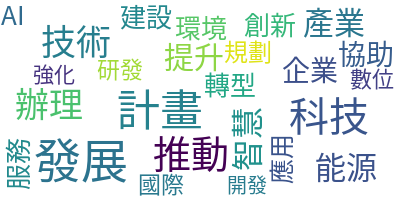

In [6]:
## 繁中字型檔案位置，方便文字雲顯示
# fontpath = "C:\Windows\Fonts\heit.ttf" # windows os
fontpath = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc" #ubuntu os

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', font_path= fontpath).generate_from_frequencies(freq)
wordcloud.to_image()

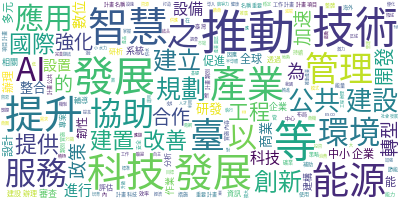

In [7]:
# 不用TF-IDF tags的話，顯示全部分詞結果

_string_ = ','.join(seg_list)
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', font_path= fontpath)
# Generate a word cloud
wordcloud.generate(_string_)
# Visualize the word cloud
wordcloud.to_image()

---

--2025-10-26 22:09:48--  https://www.moea.gov.tw/Mns/main/content/wHandEditorFile.ashx?file_id=15121
Resolving www.moea.gov.tw (www.moea.gov.tw)... 2606:4700::6812:171, 2606:4700::6812:71, 104.18.1.113, ...
Connecting to www.moea.gov.tw (www.moea.gov.tw)|2606:4700::6812:171|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391992 (383K) [application/pdf]
Saving to: ‘108.pdf’

108.pdf             100%[===================>] 382.80K  1.20MB/s    in 0.3s    

2025-10-26 22:09:49 (1.20 MB/s) - ‘108.pdf’ saved [391992/391992]

{'計畫': 104, '經濟': 26, '產業': 43, '發展': 109, '創新': 35, '推動': 56, '企業': 30, '環境': 28, '研發': 28, '系統': 18, '協助': 19, '科技': 60, '應用': 19, '能源': 45, '國際': 28, '開發': 21, '技術': 43, '智慧': 41, '進行': 21, '公共': 34, '服務': 22, '資料': 26, '標準': 22, '辦理': 26, '建設': 33}
word: 發展 tf-idf: 0.2690624938707619
word: 計畫 tf-idf: 0.25672017763815813
word: 推動 tf-idf: 0.13823394180516207
word: 產業 tf-idf: 0.10614391960039231
word: 技術 tf-idf: 0.10614391960039231
word: 創新 tf-

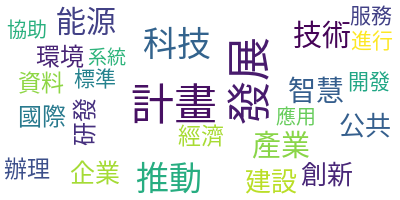

In [8]:
# 目標換108年的計劃書

!wget -O 108.pdf https://www.moea.gov.tw/Mns/main/content/wHandEditorFile.ashx?file_id=15121

reader_ = PdfReader("108.pdf")
with open("output_108.txt", "w", encoding="utf-8") as f_:
    for page in reader_.pages:
        t = page.extract_text()
        if t:
            f_.write(t + '\n')
    f_.close()

text_108 = open("output_108.txt","r",encoding="utf-8").read()


text_108 = str(text_108)

text_108 = re.sub("xe2","",text_108)
text_108 = re.sub("x80","",text_108)
text_108 = re.sub("x99","",text_108)
text_108 = re.sub("x0c","",text_108)
text_108 = re.sub("x93","",text_108)
text_108 = re.sub("xe","",text_108)
text_108 = re.sub("x93","",text_108)
text_108 = re.sub("x93","",text_108)

text_108 = re.sub("一","",text_108)
text_108 = re.sub("二","",text_108)
text_108 = re.sub("三","",text_108)
text_108 = re.sub("四","",text_108)
text_108 = re.sub("五","",text_108)
text_108 = re.sub("六","",text_108)
# text = re.sub("\\\\","",text)

text_108 = re.sub("，","",text_108)
text_108 = re.sub("、","",text_108)
text_108 = re.sub("。","",text_108)
text_108 = re.sub("與","",text_108)
text_108 = re.sub("及","",text_108)
text_108 = re.sub("（","",text_108)
text_108 = re.sub("）","",text_108)
text_108 = re.sub("「","",text_108)
text_108 = re.sub("」","",text_108)

tags = jieba.analyse.extract_tags(text_108, topK=25, withWeight=True)

seg_list = jieba.lcut(text_108, cut_all=False)
dictionary = Counter(seg_list)

freq = {}
for ele in dictionary:
    if ele in [ tu[0] for tu in tags]:
        freq[ele] = dictionary[ele]
print(freq) # 計算出現的次數

for tag in tags:
    print('word:', tag[0], 'tf-idf:', tag[1])

wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', font_path= fontpath).generate_from_frequencies(freq)
wordcloud.to_image()

In [9]:
for index_descend_ in sorted(freq.items(), key=lambda x:x[1], reverse=True):
    print(index_descend_) 

('發展', 109)
('計畫', 104)
('科技', 60)
('推動', 56)
('能源', 45)
('產業', 43)
('技術', 43)
('智慧', 41)
('創新', 35)
('公共', 34)
('建設', 33)
('企業', 30)
('環境', 28)
('研發', 28)
('國際', 28)
('經濟', 26)
('資料', 26)
('辦理', 26)
('服務', 22)
('標準', 22)
('開發', 21)
('進行', 21)
('協助', 19)
('應用', 19)
('系統', 18)


### 看文字雲的話，比較明顯是115年的「AI」是有存在在前25名TF-IDF排序中。另外能源、科技、研發這些都不離計劃書的常用詞彙。